# Importing Data into Python

```{note}
For students of CHM223, you should be familiar with simple Python syntax related to importing packages and defining variables after assignment 1. From assignment 2, you should be familiar with simple plotting using matplotlib. We will assume some of this basic knowledge in this section, however plotting in particular will be covered in more detail in another section
```

Here, we will learn how to actually import data into Python to be manipulated. This is typically done through packages, the main two that are used are `numpy` and `pandas`. Pandas is typically used for massive datasets and has a lot of built-in function for data processing and analysis. By contrast, numpy is a bit more barebones but (usefully) relatively straightforward to use.

Importing experimental data is simple in theory, but usually requires some care in practice. Ideally, all experimental data would look like the following:

| Time (s) | Conc (mM) |
|----------|-----------|
| 0        | 1         |
| 1        | 0.72      |
| 2        | 0.51      |
| 3        | 0.37      |
| 4        | 0.26      |
| 5        | 0.19      |
| 6        | 0.14      |
| 7        | 0.1       |
| 8        | 0.07      |
| 9        | 0.05      |
| 10       | 0.04      |


However in reality, it looks more like this:
<div>
<img src="images/scary_tres_data.png" alt="" width="600"/>
</div>

```{figure} images/scary_tres_data.png
---
width: 600px
---
[Imperiale, C. *et al.* (Wilson) **2023**. *ChemRxiv*](https://doi.org/10.26434/chemrxiv-2023-5k2q9)
```
(For those interested, yes, this is actual data. It is a Time-Resolved Emission Spectrum of lead sulphide quantum dots, which tracks the intensity of photoluminescence at each wavelength over time following pulsed excitation from a laser. Check out the citation source if you're interested!)

Now turning this data into something useful is the first, important step before we can do most meaningful analyses. With Python alone, there are countless ways to do this. For our purposes, we are going to learn how to use the `numpy` package to import data. 

## Sample Data files

We will be using real experimental data files throughout the textbook. These are all locally hosted on this textbook, and can also be downloaded directly from the [github repo](linkgoeshere). When relevant, we will also provide literature sources where you can learn more about the underlying research in which these data have been used!

## Reading and Importing data files: numpy.genfromtxt

`````{admonition} For CHM223 students
:class: important
This subsection is relevant for your assignment!
`````

`numpy` is useful for importing data of different filetypes, especially *.csv (plain text, [comma-separated value](https://en.wikipedia.org/wiki/Comma-separated_values) spreadsheets) and other plain text formats (e.g. *.txt files, or other extensions ...or none at all!) At a basic level, `numpy` will take any data that is **delimited** (i.e. separated by tabs, commas, anything---just like how an Excel .csv file is separated into cells) and import it into an array in Python. So the idea is to take any type of data, and turn it into something that Python (and hence ourselves!) can understand and work with.

`````{admonition} When in doubt, look at the data!
:class: tip
Data can by formatted in myriad ways, and it's very hard to be sure how its formatted without looking at it! Even if not a .csv file, most data files can be opened/viewed in a simple text editor, as seen in the examples given above. If you are unsure of how your data is formatted, open it up with notepad or an equivalent text editor and take a look! This will allow you to determine how to correctly import it into Python.
`````

Below we will see some template code to import and plot data using numpy.genfromtxt.

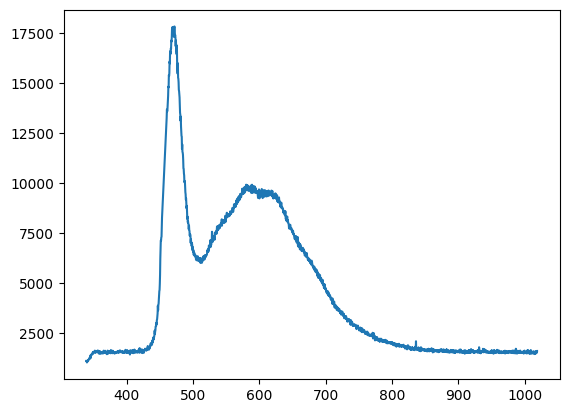

In [1]:
### IMPORT AND ROUGH PLOT DATA
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# define where our file can be found to be imported
filepath        = 'data/CdSe_EmissionSpectra.txt'

x, y            = np.genfromtxt(  
# filepath, defined below, would be the PATH to the file we are looking to have Python read.
                                filepath,
# dtype is used to specify what the data type of the imported data is. Can be a float, integer, string, anything!
                                 dtype=float,       
# delimiter defines what character separates columns of data. Here, it's just a space, but it could be a comma, tab, etc.
                                 delimiter='',      
# this allows us to skip a certain number of lines at the top of our file. Often used for skipping output from instruments and software.
                                 skip_header=14,    
# this separates our data by columns, so we can assign each column of data to a new array, such as x and y values (wavelength, intensity)
                                 unpack=True)       

# plot to try and look if data imported properly
plt.plot(x,y)
plt.show()

(This data is the emission spectra of CdSe quantum dots with functionalized surfaces to induce a large fraction of redshifted "trap" emission. Similar data was used in [Hasham, M. *et al.* (Wilson) **2023** *J. Phys. Chem. Lett.*](https://doi.org/10.1021/acs.jpclett.2c03443))

Wonderful! We can read the data, and confirmed that we did, in fact, import it properly. However quite a bit just happened, so let's go over a few parameters to explain what we just did and how you can use these tools.

- In this example, you can replace `'data/CdSe_EmissionSpectra.txt'` with a path to any other file that you want to import. (N.B. in the absence of a full file-path, when your development environment (e.g. JupyterHub, VSCode) goes looking for the file, it will pre-pend the path of the folder that your *.py or *.ipynb file is in by default.)
- `delimiter=` defines what character separates the columns in each line/row of data. For a .csv this is a comma (csv stands for comma-seperated values, after all.) Other common delimiters (in e.g. generic .txt files) are a blank space, tab, or semicolon. For a blank space, we would use `delimiter=''`
- `skip_header=` allows you to skip a certain number of lines at the top of your file. Often, outputs from instruments or software will include some metadata at the top (date/time, instrument settings, etc.), which may not be useful for plotting. Here, we use `skip_header=14` to skip the first 14 lines of our file. Why 14? Because this is how many rows of metadata we saw when we looked at the data directly in a text editor!
- `dtype=` is important because it defines which datatype numpy will expect from the data it is reading. Commonly, this will be a [float](https://en.wikipedia.org/wiki/Floating-point_arithmetic) (a format for numbers in scientific notation), but it could also be an integer, string (i.e. characters/text), or something else entirely.
- `unpack=True` separates our data by columns, so we can assign each column of data to a new array, such as x and y values (wavelength, intensity).

There are several other options we can specify, [which you can find here](https://numpy.org/devdocs/user/basics.io.genfromtxt.html). However, these are some of the most common ones you will encounter.

## Importing multiple data files at once
Often, we will have multiple sets of data that we want to collect into a single plot to visualize some trend or change. Using a simple `for` loop, we can use `numpy.genfromtxt` on multiple files in a single folder that meet some criteria, such as having a specific file extension, or having a certain phrase in their filename.

A "for loop" will perform an action repeatedly for different inputs, usually given by an array. For example, see below if we want to print each number between 1 and 10.

In [2]:
#import packages
import numpy as np
 # create an array of numbersf from 0 to 10, in steps of 1
array = np.arange(1,10,1)

# for each number in the array, print it
for i in array:
    print(i) # print each number in the array

1
2
3
4
5
6
7
8
9


We will also use a new function `os.listdir()`. This function allows us to run a terminal command through Python, in particular `dir`, which will list all of the files within a certain directory (similar to what you'd see in Windows File Explorer or iOS Finder).

As an example, here is the result of the `os.listdir()` command run on a folder on Prof. Wilson's computer containinng a bunch of data files from some photoluminescence spectroscopy on CdSe quantum dots. Each file represents one spectrum, and the overall experiment sought to highlighting the dependence of emission spectra on the incident power of the laser used to excite the sample. As a result, the experimenter used the filenames as a de facto lab-book, and wrote in some key experimental parameters---most notably the excitation power in mW:

In [3]:
# import packages
import numpy as np
import os # needed to use os.listdir()

# for each filename in the folder, print the filename
for filename in os.listdir('data/em_vs_laser/'): #os.listdir() will return each file in a folder.
    # print filename
    print(filename)

R101 532 ex 100 ms Power 550CGLP 0.13 mW.txt
R101 532 ex 100 ms Power 550CGLP 0.25 mW.txt
R101 532 ex 100 ms Power 550CGLP 13.78 mW.txt
R101 532 ex 100 ms Power 550CGLP 2.52 mW.txt
R101 532 ex 100 ms Power 550CGLP 20.6 mW.txt
R101 532 ex 100 ms Power 550CGLP 24.9 mW.txt
R101 532 ex 200 ms Power 550CGLP 0.093 mW.txt
R101 532 ex 200 ms Power 550CGLP 0.211 mW.txt
R101 532 ex 200 ms Power 550CGLP 0.597 mW.txt
R101 532 ex 200 ms Power 550CGLP 10.6 mW.txt
R101 532 ex 200 ms Power 550CGLP 2.03 mW.txt
R101 532 ex 200 ms Power 550CGLP 20.0 mW.txt
R101 532 ex 200 ms Power 550CGLP 5.45 mW.txt
R101 532 ex 3.41 mW Integration 550CGLP 1000 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 20 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 200 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 2000 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 50 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 500 ms.txt
R101 532 ex 3.41 mW Integration 550CGLP 850 ms.txt


Useful! We can combine this command to generate a list of filenames with the previous code to import each file individually, and additional lines (from, e.g. CHM223 Computational Assignment #2) to generate a plot containing a curve for each file. See the combined code below, which you'll believe could be endlessly adapted to import other data!

In [4]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os # needed to use os.listdir()

for filename in os.listdir('data/em_vs_laser/'): #os.listdir() will return each file in a folder.
    # import the data from that file
    wavelength, intensity = np.genfromtxt(f'data/em_vs_laser/{filename}',
                                          skip_header=14,
                                          delimiter='',
                                          unpack=True)

    # note: an f string is used above to insert the filename variable into the filepath!
    # this allows us to insert variables into strings more easily
    
    # plot the data from that file
    plt.plot(wavelength,intensity,label=filename)

plt.xlabel('wavelength')
plt.ylabel('intensity (a.u.)')

Text(0, 0.5, 'intensity (a.u.)')

## Excluding files: checking the filenames
Following on from the previous example, it's commonly the case that you don't want/need to plot _every_ file in a given folder. However, from what you've learned, you can use boolean logic to specify a condition on the filenames that are imported. In this particular case with the filenames above, the data files could be grouped into two categories, each from a different sub-experiment: one measuring emission intensity vs excitation power, and the other measuring emission intensity vs integration time---the amount of time that the detector exposed to the emitted light. Because the experimenter included this information in the filenames (by including either 'Power' or 'Integration', we can write an `if` statement to test each file, and only import it if it's a member of the desired group. For example, to only look at data referencing integration time, we can make a condition in our import and plot loop as follows (we'll use the filnames as the legend entries):

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os

for filename in os.listdir('data/em_vs_laser/'): #os.listdir() will return each file in a folder.
    # import the data from that file
    wavelength, intensity = np.genfromtxt(f'data/em_vs_laser/{filename}',skip_header=14,delimiter='',unpack=True) # we can determine skip_header=14 by opening the file in a text editor and counting the number of lines before the data starts.
    # check if filename has the word Integration in it
    if 'Integration' in filename:
        plt.plot(wavelength,intensity,label=filename) # plot the intensity
    # we don't define an else statement, so if the filename does not have the word Integration in it, nothing will happen.

# add labels and legend
plt.xlabel('wavelength')
plt.ylabel('intensity (a.u.)')
plt.legend()

## Parsing filenames: string.split()
Lastly, continuing our data-import example, we can modify the filenames if we want to be more succinct, or even extract experimental details (like the excitation power used) if we want to. In this example, the only information that we're looking for from the filename is the integration time at the end. We can parse this out using another function called `.split`, which (you might guess) allows us to split a string into multiple smaller strings based on some character separator. For example, if we want to split the filename into 'words' which are each separated by a space, we could do:

In [6]:
print(filename)
print(filename.split(' '))


R101 532 ex 3.41 mW Integration 550CGLP 850 ms.txt
['R101', '532', 'ex', '3.41', 'mW', 'Integration', '550CGLP', '850', 'ms.txt']


Then, we could select the eighth element in this new array of 'words', which (given the format of the filename) is the integration time that we're looking for as legend labels for this experiment. Code could look like this: `words = filename.split(' ')`, and then `label=words[8]`. We can see this implemented in the previous data as a single, combined line of code, below:

In [7]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os

for filename in os.listdir('data/em_vs_laser/'): #os.listdir() will return each file in a folder.
    wavelength, intensity = np.genfromtxt(f'data/em_vs_laser/{filename}',skip_header=14,delimiter='',unpack=True) # import the data from that file
    # check if filename has the word Integration in it
    if 'Integration' in filename:
        label = filename.split(' ')[8] # Extract the integration time from the filename using the tools discussed above
        plt.plot(wavelength,intensity,label=label) # plot the intensity
    # we don't define an else statement, so if the filename does not have the word Integration in it, nothing will happen.

# add labels and legend
plt.xlabel('wavelength')
plt.ylabel('intensity (a.u.)')
plt.legend()
legend.set_title('Integration time (ms)')

NameError: name 'legend' is not defined